# Welcome to Full Stack Machine Learning’s Week 1 Project!


This week, you’ll become more familiar with how an engineer thinks about ML software and products and you’ll also build a first baseline machine learning workflow using Metaflow.
We’ll be using the [Women's E-Commerce Clothing Reviews dataset](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews), which Kaggle states is a 

> dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”. 


The machine learning task will be sentiment analysis, classifying each review as having positive or negative sentiment.

To complete the assignment:
1. Fill in the TODO sections of this notebook.
2. Login to the GitHub account you are using for this course with `gh auth login`.
3. Clone your submission repository.
4. Copy/move this notebook file into the repository. 
5. Push the results to your repository.
6. Create a link to the repository in Corise.

## Task 1. EDA

Acquaint yourself with the dataset by importing it into a Jupyter notebook, using common EDA methods, and building a baseline ML model that classifies all data points as the majority class.

### Import Dependencies
You can change these if you wish! 
These packages are already installed in the `full-stack-metaflow-corise` environment. 
If you are feeling adventurous, you can install other packages you want in the conda environment too, or even make your own environment from scratch and include with your submission! 

In [1]:
from collections import Counter
import pandas as pd
import numpy as np 
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

### Configure plots
This part is optional styling your plots and cards.

In [2]:
YELLOW = '#FFBC00'
GREEN = '#37795D'
PURPLE = '#5460C0'
BACKGROUND = '#F4EBE6'
colors = [GREEN, PURPLE]
custom_params = {
    'axes.spines.right': False, 'axes.spines.top': False,
    'axes.facecolor':BACKGROUND, 'figure.facecolor': BACKGROUND, 
    'figure.figsize':(8, 8)
}
sns_palette = sns.color_palette(colors, len(colors))
sns.set_theme(style='ticks', rc=custom_params)

### Load the data 

In [3]:
df = pd.read_csv('../../data/Womens Clothing E-Commerce Reviews.csv', index_col=0)

# light data cleaning
df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
df['review_text'] = df['review_text'].astype('str')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing_id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review_text              23486 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended_ind          23486 non-null  int64 
 6   positive_feedback_count  23486 non-null  int64 
 7   division_name            23472 non-null  object
 8   department_name          23472 non-null  object
 9   class_name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe()

,clothing_id,age,rating,recommended_ind,positive_feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


### Plot the distribution of [1, 5] ratings

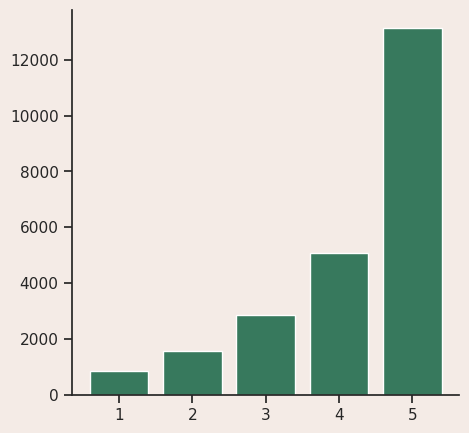

In [6]:
# We will use the `rating` to create a label on this dataset.
# We can see the mean rating is above 4, pretty happy customers! 
# Let's visualize a distribution of the labels.
rating_distribution = df.rating.value_counts()
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.bar(x=rating_distribution.index, height=rating_distribution.values, color=GREEN);

### Label data for supervised learning

In [17]:
def labeling_function(row):
    """
    A function to derive labels from the user's review data.
    This could use many variables, or just one. 
    In supervised learning scenarios, this is a very important part of determining what the machine learns!
   
    A subset of variables in the e-commerce fashion review dataset to consider for labels you could use in ML tasks include:
        # rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
        # recommended_ind: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
        # positive_feedback_count: Positive Integer documenting the number of other customers who found this review positive.

    In this case, we are doing sentiment analysis. 
    To keep things simple, we use the rating only, and return a binary positive or negative sentiment score based on an arbitrarty cutoff. 
    """
    if row['rating']> 2.5:
       return 1
    elif row['rating']<= 2.5:
        return 0

    # TODO: Write an algorithm that returns a 0 or 1 label for each row in the dataset, based on properties of the row.
    # To do this, you will need to investigate the properties of the rows and pick a good algorithm for assigning labels to data points.
    # NOTE: In practice, this label often comes from some future event in your production system that your model won't have access to at prediction time.
#    return 0

# final features and labels
_has_review_df = df[df['review_text'] != 'nan']
reviews = _has_review_df['review_text']
labels = _has_review_df.apply(labeling_function, axis=1)
has_review_df = pd.DataFrame({'label': labels, **_has_review_df})
del _has_review_df

# a few checks
assert labels.shape == reviews.shape, "Labels and reviews should be equal shape vectors!"
assert not sum([1 if r == 'nan' else 0 for r in reviews]) > 0, "There are `nan` values in the feature set!"
print(labels)

0        1
1        1
2        1
3        1
4        1
        ..
23481    1
23482    1
23483    1
23484    1
23485    1
Length: 22641, dtype: int64


#### What percentage of points does your algorithm label with positive sentiment?

In [18]:
pct_positive_sentiment = labels.sum() / labels.shape[0]
print(f"{round(100*pct_positive_sentiment,3)}% of the labels have positive sentiment.")

89.532% of the labels have positive sentiment.


### View samples of labeled data

In [19]:
# params
positive_color = 'green'
negative_color = 'red'
N = 10

# fetch subset of data
idxs = np.random.choice(reviews.index, 10, replace=False)
_labels_subset = labels[idxs]
_reviews_subset = reviews[idxs]

# print each sample and color the text by sentiment
for label, review in zip(_labels_subset, _reviews_subset):
    color = negative_color if label == 0 else positive_color
    print(colored(review, color), end='\n\n')

# in a real world project, iterating at this point is crucial.
# you need to look through the way your data is labeled, and ensure it is aligned with your intuitive understanding and objectives of the algorithm.
# there are also automated tools to aid your label cleaning operations, such as: https://github.com/cleanlab/cleanlab

Oh my! this dress fits wonderfully on! so ready for autumn! i have a big bust, this dress does not split at the buttons.

Highly recommend this top. received lots of compliments on the day that i wore. recommend wearing with a tank top.

I wanted to love these, they are cute and warm - but they have absolutely no elasticity. i'm so mad at myself for not reading the reviews because i ended up wasting money on shipping 2 pairs of leggings that i ultimately took right back to the store.

Loved this dress. it does run a little long even with 3" high heels. i am5 '3", and probably would have been
better with a petite size. often i do not like the proportions with petite so i ordered the regular size. i feel very feminine in this dress and love the opening at the side. i can walk in it if i hold the skirt up in front a tiny bit. not sure if i will hem it. the print is pretty; however, busy. i will keep this dress as it does make one look slim and romantic. i added an black belt, w

Pants are

### Filter stop words from the reviews

In [20]:
nltk.download('stopwords')
stopwords = list(nltk.corpus.stopwords.words("english"))
non_stopwords = []
for review in reviews: 
    for word in review.split():
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word == '':
            continue
        if not word.lower() in stopwords:
            non_stopwords.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/workspace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# find the K most common words
K = 25
k_most_common_non_stopwords = np.array(Counter(non_stopwords).most_common(K))
words = k_most_common_non_stopwords[:, 0]
counts = k_most_common_non_stopwords[:, 1].astype(np.int32)

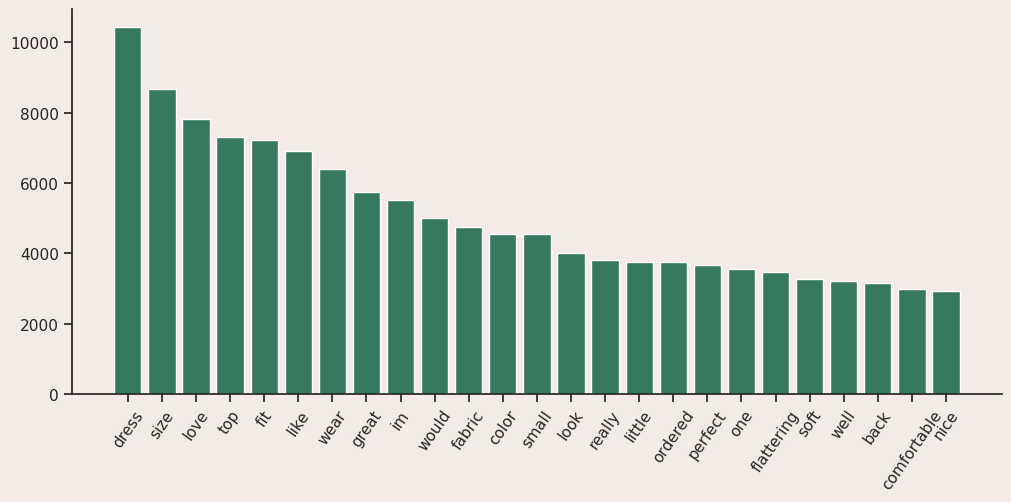

In [22]:
# make a bar plot
fig,ax = plt.subplots(1,1,figsize=(12,5))
plt.xticks(rotation = 55)
ax.bar(x=words, height=counts, color=GREEN);

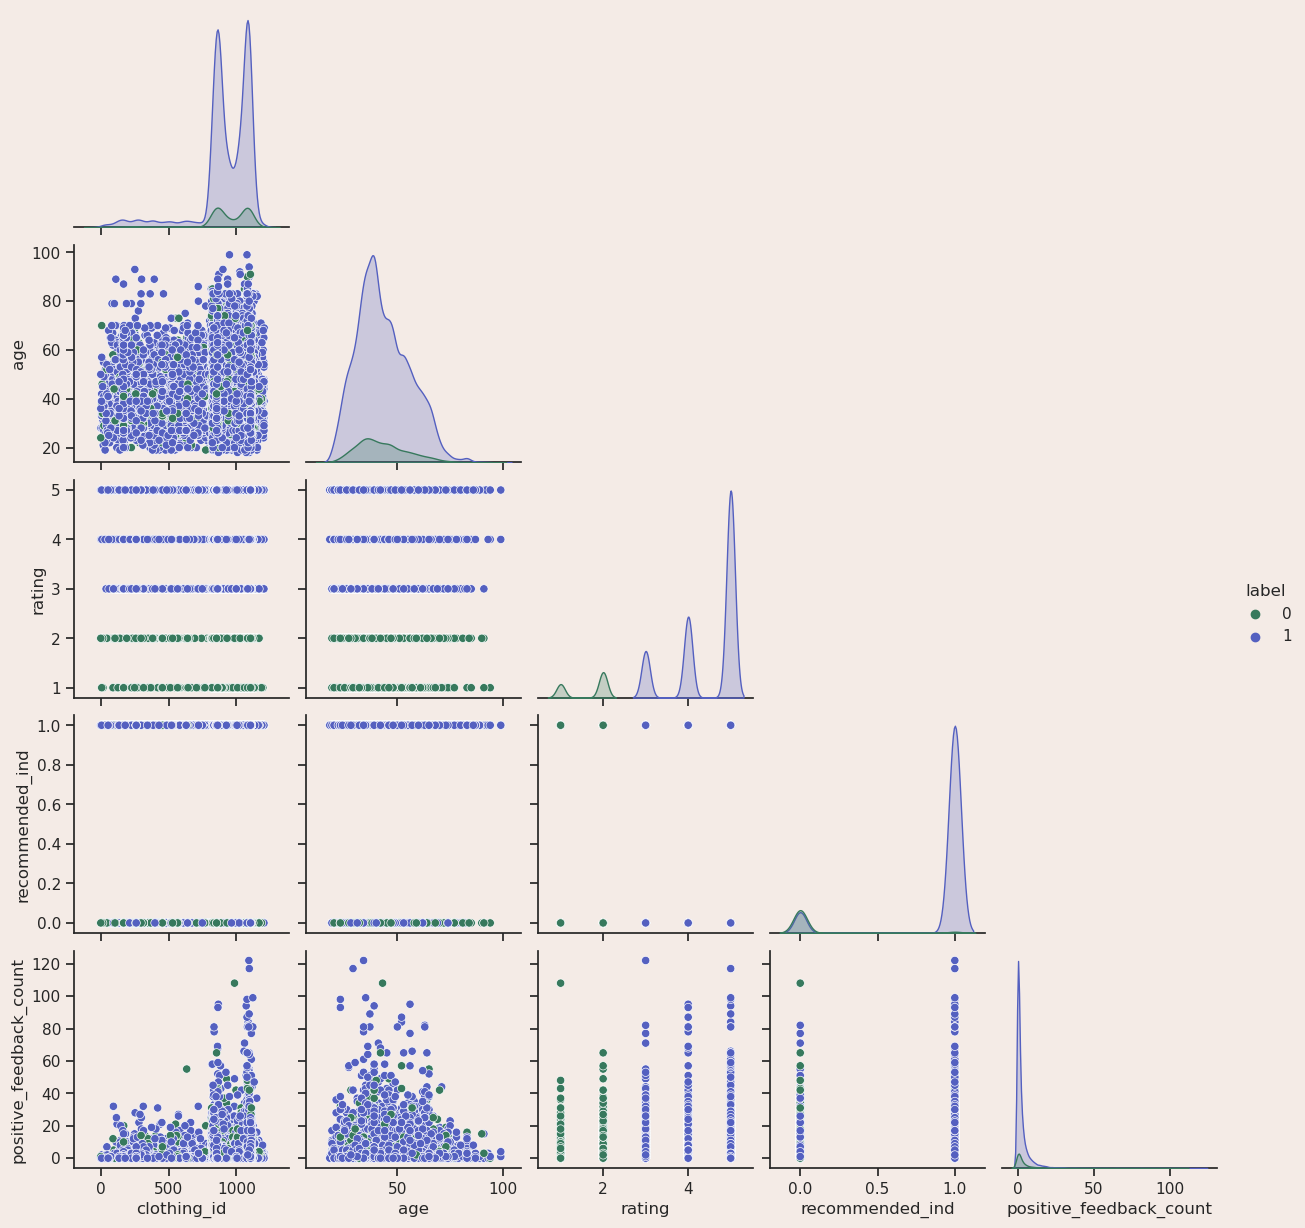

In [23]:
# what do the other features in the data look like?
sns.pairplot(data=has_review_df, hue='label', corner=True, palette=sns_palette);

## Task 2: You’re a PM for ML

Imagine you’re a PM working on a product that uses a sentiment analysis classifier, as described above. Complete this cell with a paragraph in each section that outlines:

### 1. The business value

By using sentiment analysis classify I can automate the identification of popular and unpopular products and the corresponding feedback. That will allow us to improve the unpopular product and also inform us on which products to focus our sales-effort on.

### 2. The scope

The objective/scope of this project would be to use sentiment analysis classifer in a way that boosts revenue from sales. This is because the classifer will help the business understand which products are popular and which are not.

### 3. How to measure success

Success can measured by using our sentiment analysis classifier to measure how revenue after implementation of sentiment analysis classifier.

### 4. How to monitor success

By continuously measuring the ration of positive to negative responses using our sentiment analysis classifer, we can monitor product feedback. 

## Task 3: Baseline Machine Learning Flow

In [4]:
%%writefile baseline_flow.py 
from metaflow import FlowSpec, step, Flow, current, Parameter, IncludeFile, card, current
from metaflow.cards import Table, Markdown, Artifact
from sklearn.metrics import roc_auc_score, accuracy_score



# TODO move your labeling function from above here

def labeling_function(row):
    """
    A function to derive labels from the user's review data.
    This could use many variables, or just one. 
    In supervised learning scenarios, this is a very important part of determining what the machine learns!
   
    A subset of variables in the e-commerce fashion review dataset to consider for labels you could use in ML tasks include:
        # rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
        # recommended_ind: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
        # positive_feedback_count: Positive Integer documenting the number of other customers who found this review positive.

    In this case, we are doing sentiment analysis. 
    To keep things simple, we use the rating only, and return a binary positive or negative sentiment score based on an arbitrarty cutoff. 
    """
    if row['rating']> 2.5:
       return 1
    else:
        return 0


#labeling_function = lambda row: 0

class BaselineNLPFlow(FlowSpec):

    split_size = Parameter('split-sz', default=0.2)
    #data = IncludeFile('data', default='data/Womens Clothing E-Commerce Reviews.csv')
    data = IncludeFile('data', default='/home/workspace/workspaces/full-stack-ml-metaflow-corise-week-1/data/Womens Clothing E-Commerce Reviews.csv')

    @step
    def start(self):

        import pandas as pd
        import io 
        from sklearn.model_selection import train_test_split
        
        # load dataset packaged with the flow.
        # this technique is convenient when working with small datasets that need to move to remove tasks.
        df = pd.read_csv(io.StringIO(self.data))
        print(df)
        # filter down to reviews and labels 
        df.columns = ["_".join(name.lower().strip().split()) for name in df.columns]
        df['review_text'] = df['review_text'].astype('str')
        _has_review_df = df[df['review_text'] != 'nan']
        reviews = _has_review_df['review_text']
        labels = _has_review_df.apply(labeling_function, axis=1)
        self.df = pd.DataFrame({'label': labels, **_has_review_df})
        del df
        del _has_review_df

        # split the data 80/20, or by using the flow's split-sz CLI argument
        _df = pd.DataFrame({'review': reviews, 'label': labels})
        self.traindf, self.valdf = train_test_split(_df, test_size=self.split_size)
        print(f'num of rows in train set: {self.traindf.shape[0]}')
        print(f'num of rows in validation set: {self.valdf.shape[0]}')

        self.next(self.baseline)

    @step
    def baseline(self):
        "Compute the baseline"
        
        ### TODO: Fit and score a baseline model on the data, log the acc and rocauc as artifacts.
        self.valdf["all_0"] = 0
        self.valdf["all_1"] = 1
        self.base_acc = 0
        self.base_rocauc = 0
        try:
            self.base_acc = accuracy_score(self.valdf["label"], self.valdf["all_1"])
            self.base_rocauc = roc_auc_score(self.valdf["label"], self.valdf["all_1"])

        except:
            print('Only 1 label')

        self.next(self.end)
        
    @card(type='corise') # TODO: after you get the flow working, chain link on the left side nav to open your card!
    @step
    def end(self):

        msg = 'Baseline Accuracy: {}\nBaseline AUC: {}'
        print(msg.format(
            round(self.base_acc,3), round(self.base_rocauc,3)
        ))
   

        current.card.append(Markdown("# Womens Clothing Review Results"))
        current.card.append(Markdown("## Overall Accuracy"))
        current.card.append(Artifact(self.base_acc))

        current.card.append(Markdown("## Examples of False Positives"))
        # TODO: compute the false positive predictions where the baseline is 1 and the valdf label is 0. 
        # TODO: display the false_positives dataframe using metaflow.cards
        self.false_positive_percentage = sum(self.valdf["label"]-self.valdf["all_1"])/len(self.valdf["all_1"])
        self.false_positive_df = self.valdf[self.valdf["label"]==0]
        print(self.false_positive_df)

        current.card.append(Table.from_dataframe(self.false_positive_df))
        # Documentation: https://docs.metaflow.org/api/cards#table
        
        current.card.append(Markdown("## Examples of False Negatives"))
        # TODO: compute the false positive predictions where the baseline is 0 and the valdf label is 1. 
        # TODO: display the false_negatives dataframe using metaflow.cards
        self.false_negative_percentage = sum(self.valdf["label"]-self.valdf["all_0"])/len(self.valdf["all_1"])        
        self.false_negative_df = self.valdf[(self.valdf["label"]==1)]
        print(self.false_negative_df)
        current.card.append(Table.from_dataframe(self.false_negative_df))
        print(self.valdf['label'])
if __name__ == '__main__':
    BaselineNLPFlow()

Overwriting baseline_flow.py


In [6]:
! python baseline_flow.py run

Metaflow 2.7.21.4 executing BaselineNLPFlow for user:sandbox
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
Including file /home/workspace/workspaces/full-stack-ml-metaflow-corise-week-1/data/Womens Clothing E-Commerce Reviews.csv of size 8MB 
2023-04-30 04:13:23.165 Workflow starting (run-id 31), see it in the UI at https://ui-pw-225815567.outerbounds.dev/BaselineNLPFlow/31
2023-04-30 04:13:23.448 [31/start/163 (pid 5845)] Task is starting.
2023-04-30 04:13:26.396 [31/start/163 (pid 5845)] Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
2023-04-30 04:13:26.605 [31/start/163 (pid 5845)] 0               0          767   33  ...       Initmates        Intimate   Intimates
2023-04-30 04:13:26.605 [31/start/163 (pid 5845)] 1               1         1080   34  ...         General         Dresses     Dresses
2023-04-30 04:13:26.605 [31/start/163 (pid 5845)] 2               2         1077   60  ...         General        